In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from langdetect import detect
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/abhishek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
# Load the social media data set from a CSV file
data = pd.read_csv("./Tweets.csv")

# Convert the tweet_created column to datetime format
data['tweet_created'] = pd.to_datetime(data['tweet_created'], format="%Y-%m-%d %H:%M:%S %z")

# Extract the year, month, day, and hour into separate columns
data['year'] = data['tweet_created'].apply(lambda x: x.year)
data['month'] = data['tweet_created'].apply(lambda x: x.month)
data['day'] = data['tweet_created'].apply(lambda x: x.day)
data['hour'] = data['tweet_created'].apply(lambda x: x.hour)

# Display the updated dataframe
print(np.unique(data['hour']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


(9,)


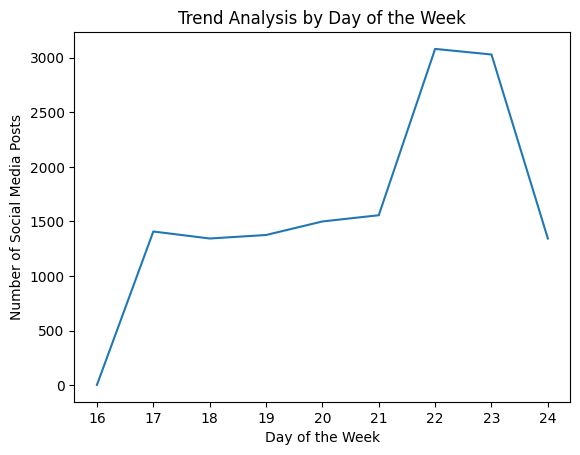

In [49]:
# Analyze trends by day
day_counts = data.groupby(data['day']).size()
print(day_counts.index.shape)
plt.plot(day_counts.index, day_counts.values)
plt.title('Trend Analysis by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Social Media Posts')
plt.show()
# Similary it can be done for month and year , the data currently in use does not have year and month 

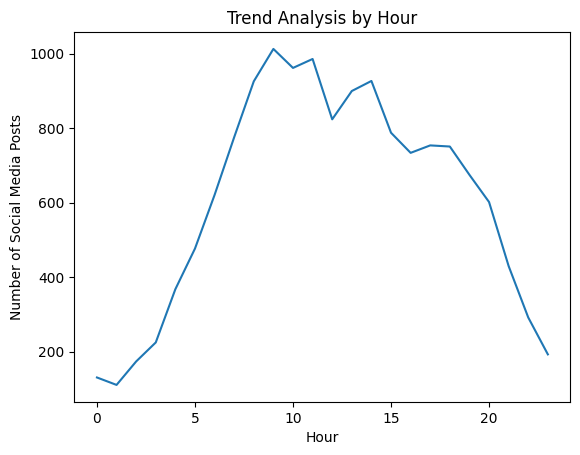

In [52]:
hour_counts = data.groupby('hour').size()
plt.plot(hour_counts.index, hour_counts.values)
plt.title('Trend Analysis by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Social Media Posts')
plt.show()

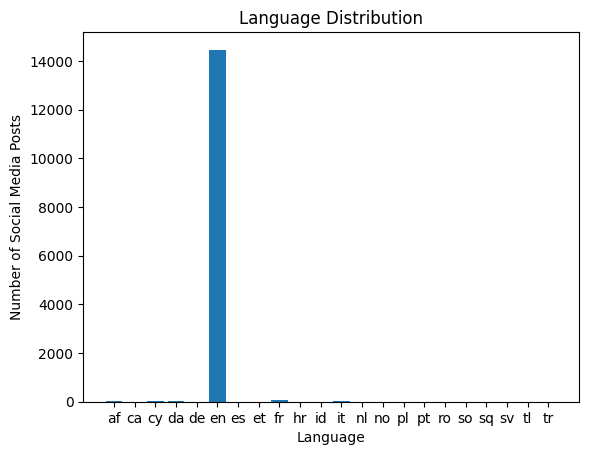

In [53]:
# Detect language of the social media data set
data['language'] = data['text'].apply(lambda x: detect(x))
language_counts = data.groupby('language').size()
plt.bar(language_counts.index, language_counts.values)
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Number of Social Media Posts')
plt.show()